In [1]:
from gensim.models import Word2Vec
from nltk.corpus import brown, movie_reviews, treebank

b = Word2Vec(brown.sents())
mr = Word2Vec(movie_reviews.sents())
t = Word2Vec(treebank.sents())


C:\Users\Madhu\AppData\Local\Continuum\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
Using TensorFlow backend.


In [2]:
b.most_similar('money', topn=5)

[('care', 0.9162325859069824),
 ('chance', 0.9033101797103882),
 ('job', 0.8962575793266296),
 ('trouble', 0.865729570388794),
 ('everything', 0.8608913421630859)]

In [3]:
mr.most_similar('money', topn=5)

[('attention', 0.7720243334770203),
 ('eyes', 0.7613162994384766),
 ('chance', 0.7575225830078125),
 ('him', 0.7413977384567261),
 ('home', 0.7171825170516968)]

In [4]:
t.most_similar('money', topn=5)

[("'", 0.9998846054077148),
 ('Department', 0.9998763203620911),
 ('new', 0.9998719096183777),
 ('only', 0.999869704246521),
 ('all', 0.9998676776885986)]

In [5]:
b.most_similar('great', topn=5)

[('experience', 0.8813475370407104),
 ('common', 0.8701456785202026),
 ('limited', 0.8338633179664612),
 ('part', 0.8250170946121216),
 ('life', 0.8192691802978516)]

In [6]:
mr.most_similar('great', topn=5)

[('nice', 0.842928409576416),
 ('decent', 0.8070847392082214),
 ('wonderful', 0.8012890219688416),
 ('good', 0.7824029922485352),
 ('strong', 0.7726178169250488)]

In [7]:
t.most_similar('great', topn=5)

[('if', 0.9991433024406433),
 ('no', 0.9991424679756165),
 ('what', 0.9991087913513184),
 ('we', 0.9991076588630676),
 ('people', 0.999099850654602)]

In [8]:
vocab=t.wv.vocab 
labels=[]  # words (keys in vocub)
for key in vocab:
    labels.append(key)

In [9]:
label=labels[0:10]
label

[',', '61', 'years', 'old', 'will', 'the', 'board', 'as', 'a', 'nonexecutive']

In [10]:
from sklearn.manifold import TSNE #for plotting
import matplotlib.pyplot as plt

print (t.most_similar('great' , topn=5))

X = t[t.wv.vocab] #t.wv.vocab --> dict of words and vectors (vocublury)
                  # X--> word vector object -->numpy array vectors
    
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)


[('if', 0.9991433024406433), ('no', 0.9991424679756165), ('what', 0.9991087913513184), ('we', 0.9991076588630676), ('people', 0.999099850654602)]


In [11]:
X_tsne[1]

array([ 0.74888655, -0.07577975])

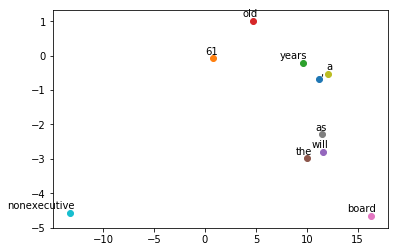

In [12]:
 for i, label in enumerate(label): #plotting first 10 words in dict(vocab) 
        q,w=X_tsne[i,:]
        plt.scatter(q, w)
        plt.annotate(label, xy=(q, w), xytext=(5, 2),
            textcoords='offset points', ha='right', va='bottom')
plt.show()
        

In [13]:
#plotting output vectors
output=t.most_similar('bad', topn=5)

In [14]:
output

[('like', 0.9983766674995422),
 ('make', 0.998309314250946),
 ('when', 0.9982990622520447),
 ('take', 0.9982855319976807),
 ('his', 0.9982786774635315)]

In [15]:
wvlist=['bad']
for i in output:
    wvlist.append(i[0])
wvlist

['bad', 'like', 'make', 'when', 'take', 'his']

In [16]:
keyindexvocab=[]
for i in wvlist:
    keyindexvocab.append(list(vocab.keys()).index(i))
keyindexvocab

[1044, 451, 37, 510, 677, 766]

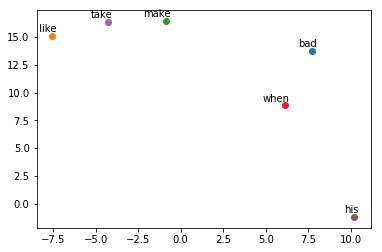

In [17]:
for i,label in zip(keyindexvocab,wvlist):
    x,y=X_tsne[i,0],X_tsne[i,1]
    plt.scatter(x,y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2),
            textcoords='offset points', ha='right', va='bottom')
plt.show()
    